In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# Set visualization style
plt.style.use('ggplot')
sns.set_palette('viridis')

In [3]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
# Display the first few rows of the dataset
df.head()

,#,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,#,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


2. Data Cleaning and Preprocessing

In [6]:
# Check dataset information
print(f"Dataset shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)

print("\nChecking for missing values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Print column names to verify
print("\nColumns in dataset:")
print(df.columns.tolist())

# Drop unnecessary columns (correct column names)
df = df.drop(['#', 'CustomerId', 'Surname'], axis=1)

Dataset shape: (10000, 14)

Data Types:
#                    int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Checking for missing values:
#                  0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Duplicate rows: 0

Descriptive Statistics:
                 #    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+0

3.1 Target Variable Distribution


Churn rate: 20.37%
Retention rate: 79.63%


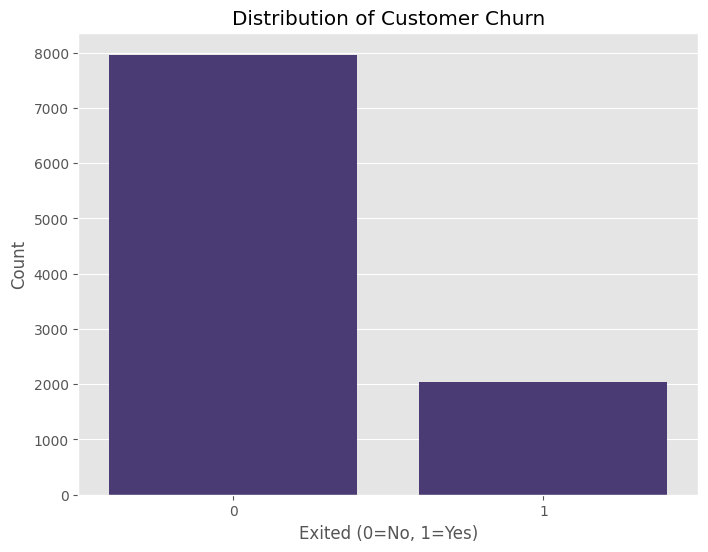

In [7]:
# Distribution of target variable (Exited)
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Count')

# Calculate percentages
churn_percentage = df['Exited'].value_counts(normalize=True) * 100
print(f"\nChurn rate: {churn_percentage[1]:.2f}%")
print(f"Retention rate: {churn_percentage[0]:.2f}%")
plt.show()

3.2 Numerical Features Analysis


Summary Statistics for Numerical Features:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000  


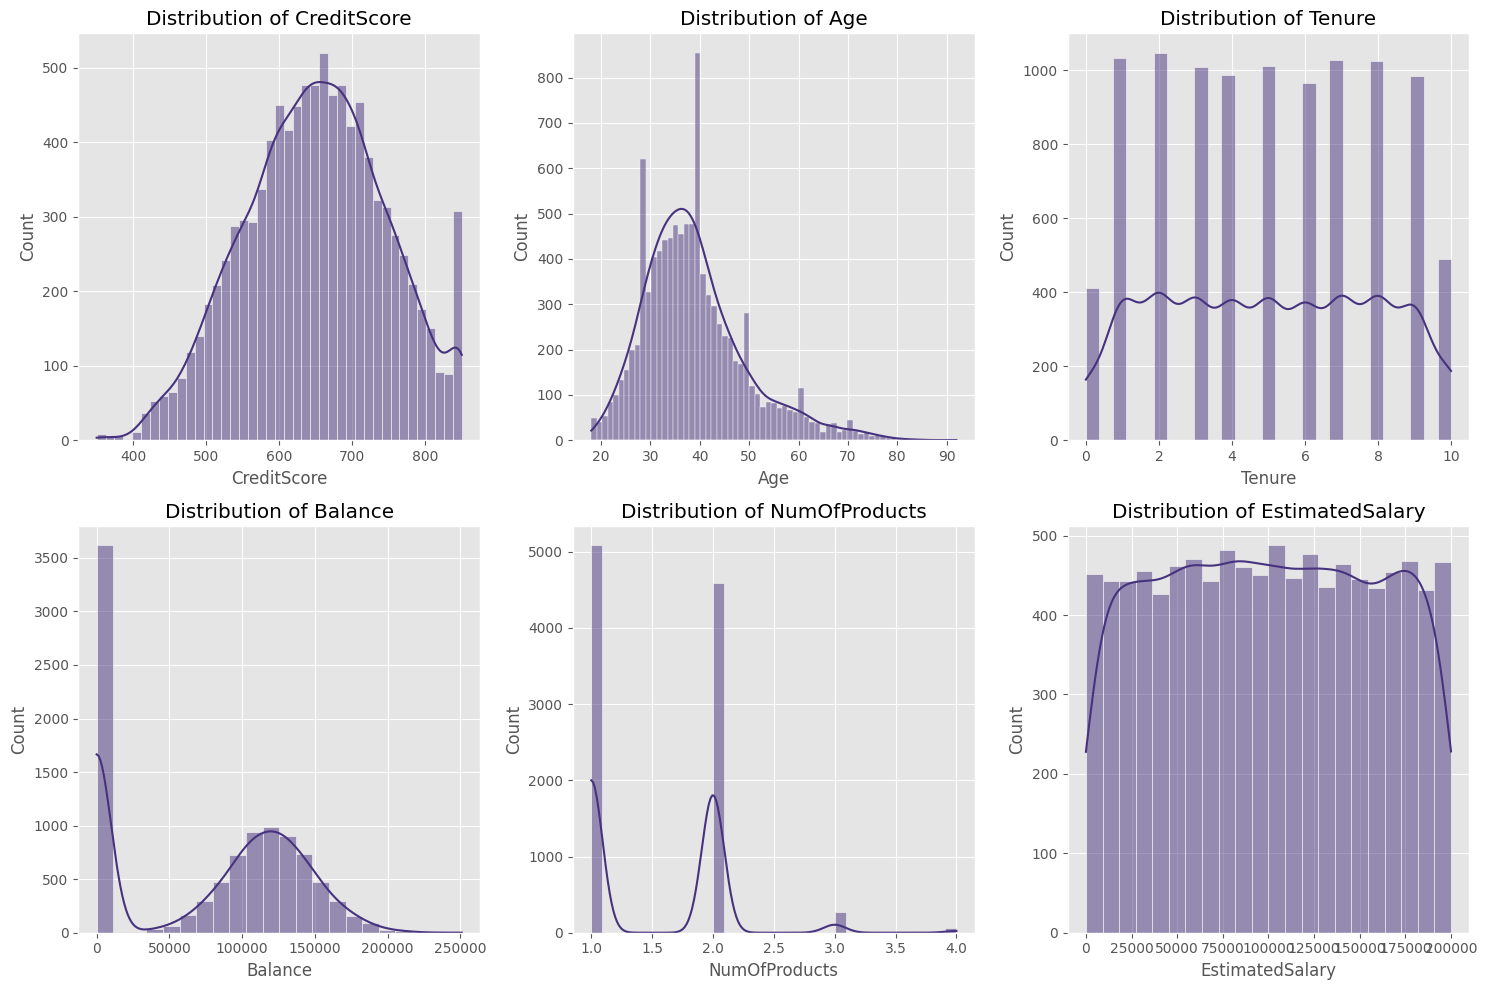

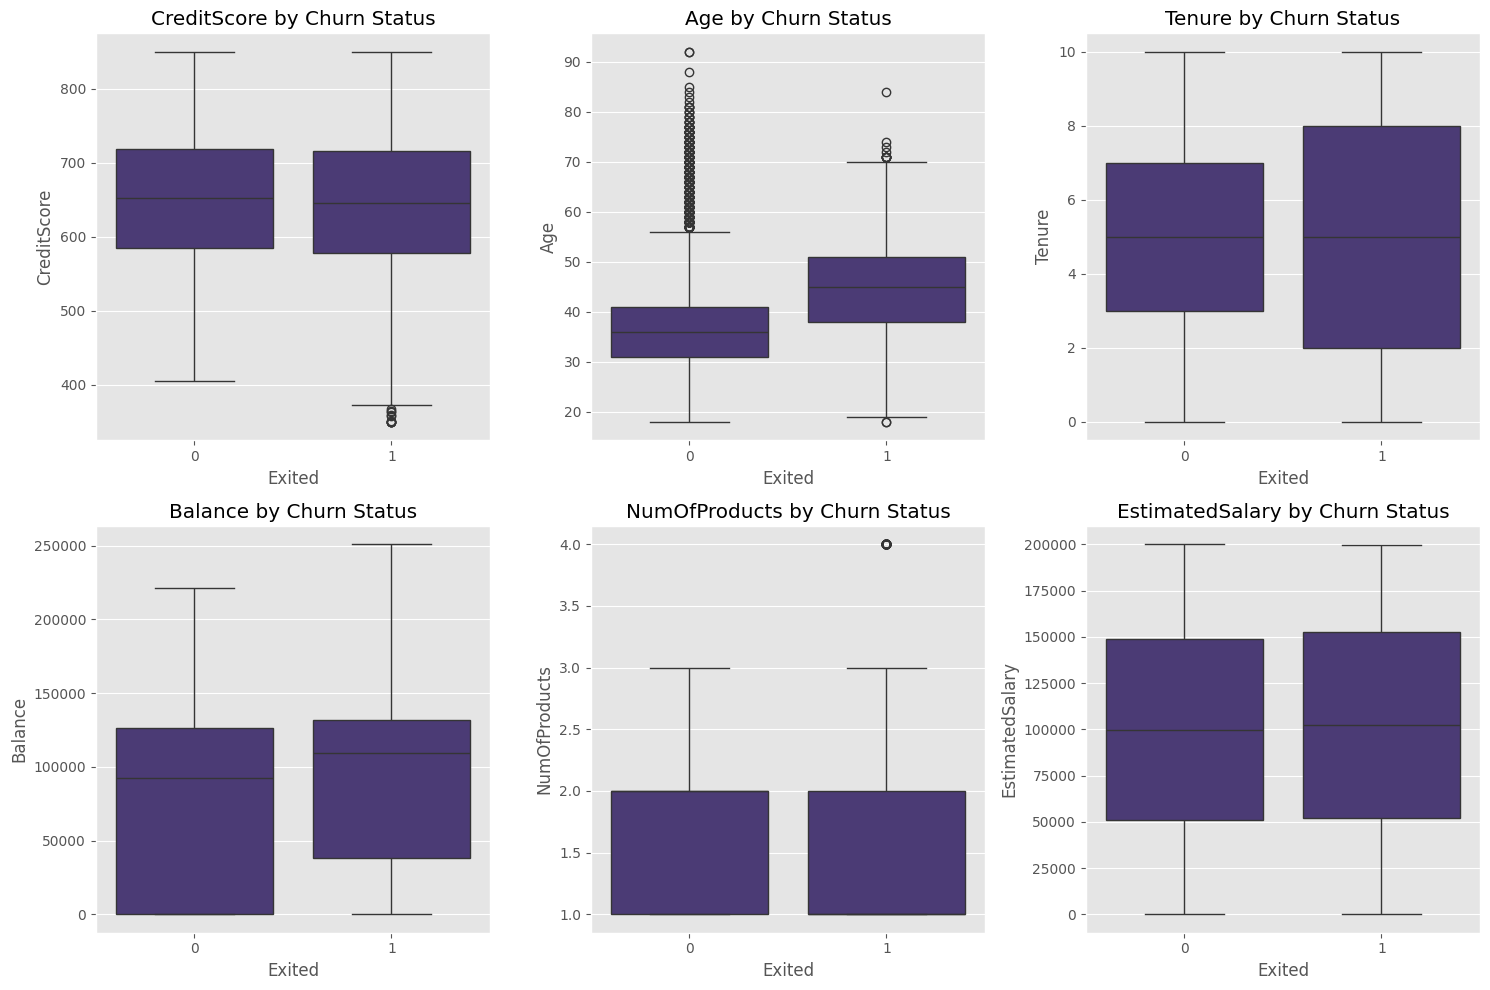

In [8]:
# Distribution and summary of numerical features
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Summary statistics
print("\nSummary Statistics for Numerical Features:")
print(df[num_features].describe())

# Distribution plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} by Churn Status')
plt.tight_layout()
plt.show()

3.3 Categorical Features Analysis

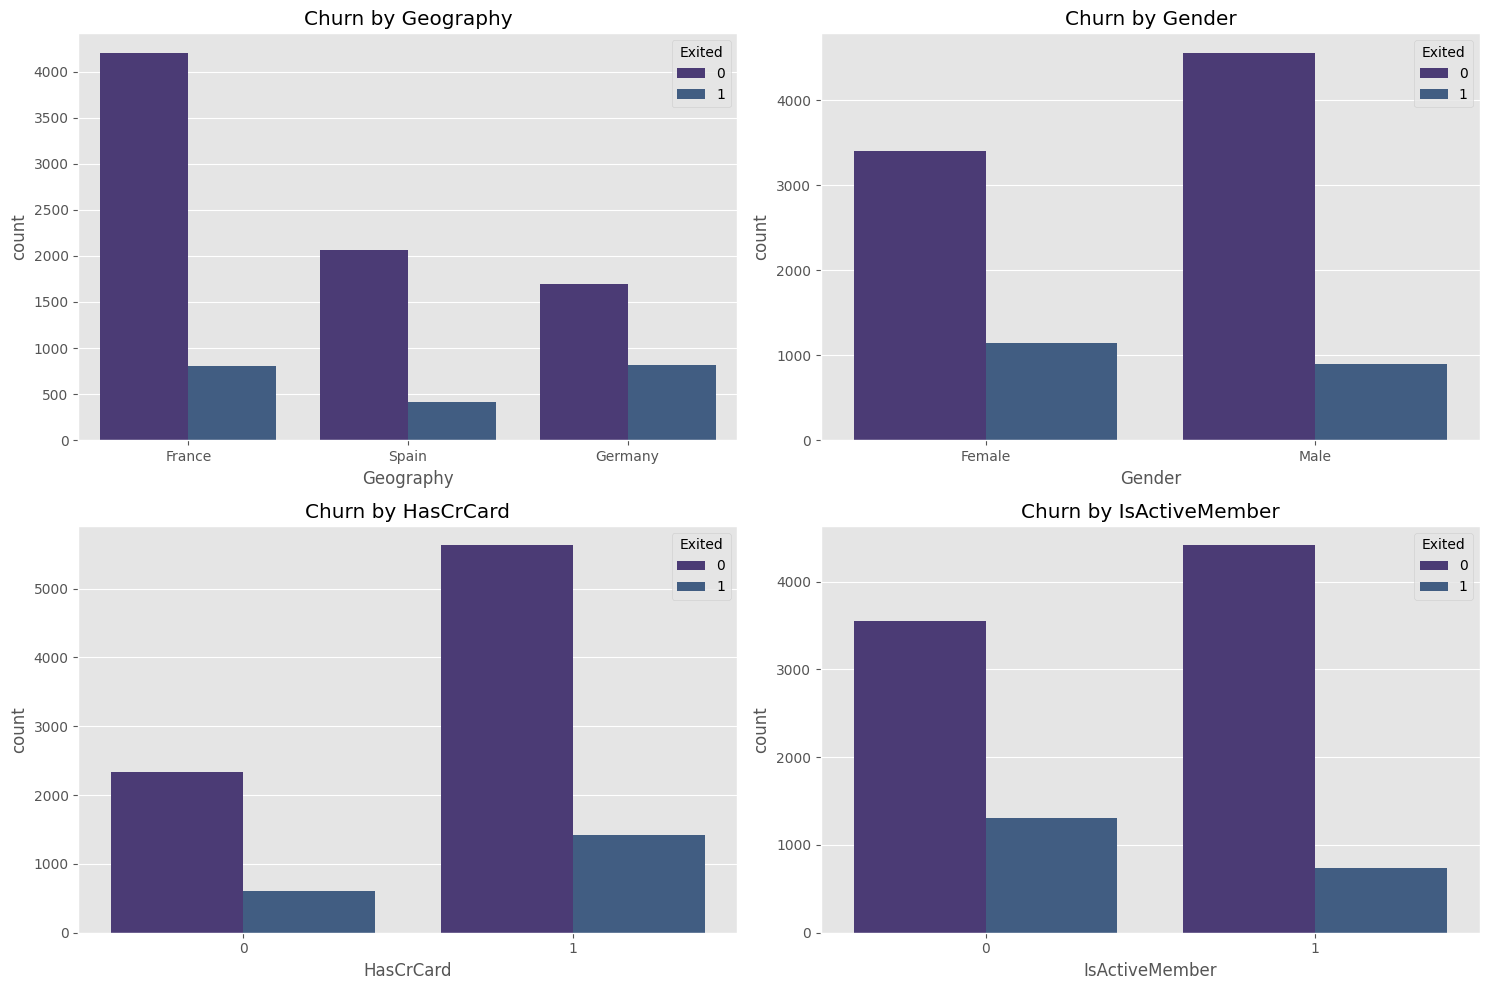


Distribution of Geography:
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

Churn rate by Geography:
Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

Distribution of Gender:
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

Churn rate by Gender:
Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

Distribution of HasCrCard:
HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64

Churn rate by HasCrCard:
HasCrCard
0    20.814941
1    20.184266
Name: Exited, dtype: float64

Distribution of IsActiveMember:
IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64

Churn rate by IsActiveMember:
IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64


In [9]:
# Distribution of categorical features
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=feature, hue='Exited', data=df)
    plt.title(f'Churn by {feature}')
plt.tight_layout()
plt.show()

# Calculate percentages for each category
for feature in cat_features:
    print(f"\nDistribution of {feature}:")
    print(df[feature].value_counts(normalize=True) * 100)
    
    print(f"\nChurn rate by {feature}:")
    churn_by_category = df.groupby(feature)['Exited'].mean() * 100
    print(churn_by_category)

3.4 Correlation Analysis

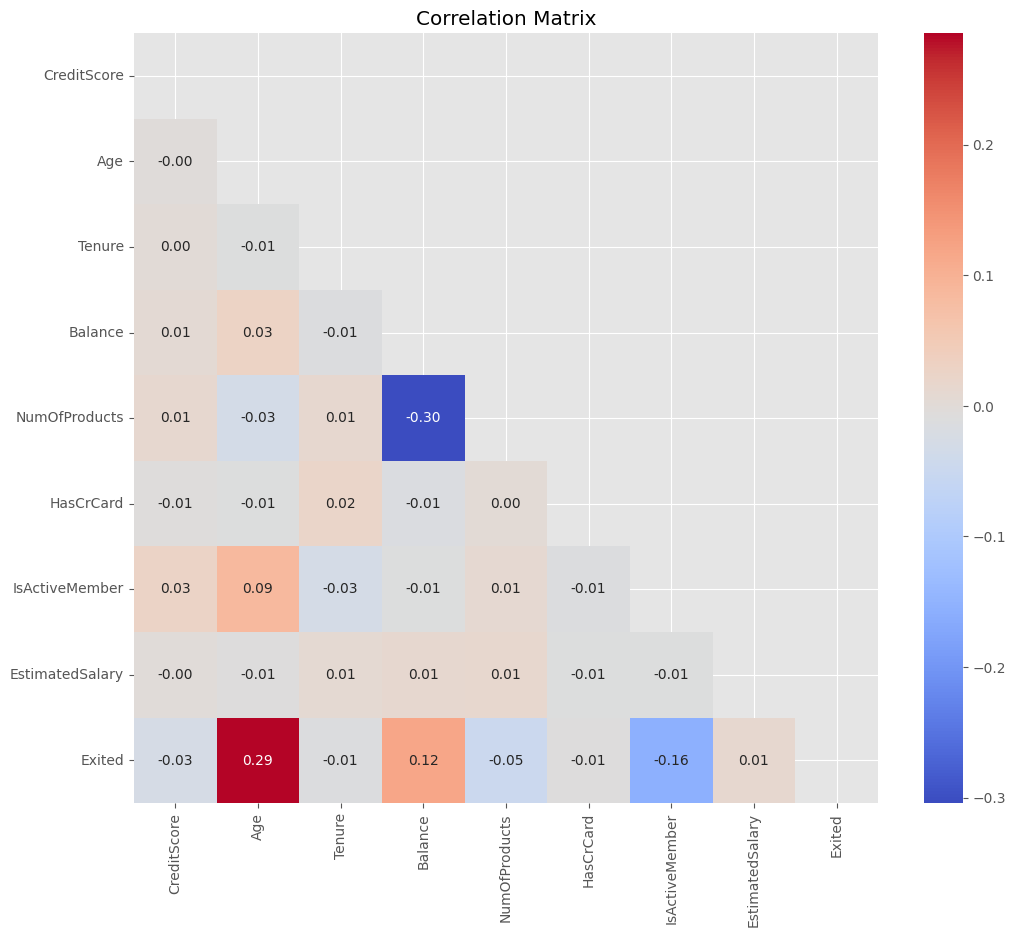


Correlation with Target Variable (Exited):
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [10]:
# Correlation analysis - use only numerical columns
# Get only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

# Feature correlation with target
corr_with_target = correlation_matrix['Exited'].sort_values(ascending=False)
print("\nCorrelation with Target Variable (Exited):")
print(corr_with_target)

3.5 Age Analysis

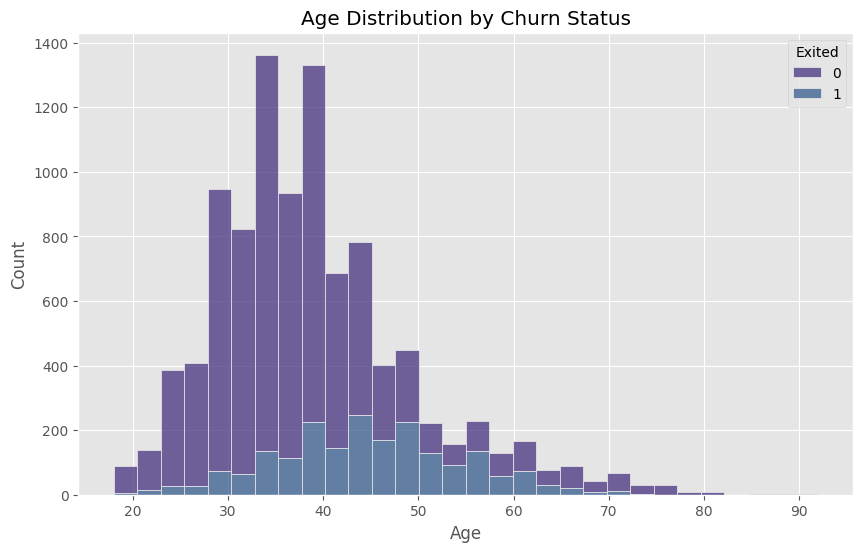

C:\Users\cpill\AppData\Local\Temp\ipykernel_3096\1783676739.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100


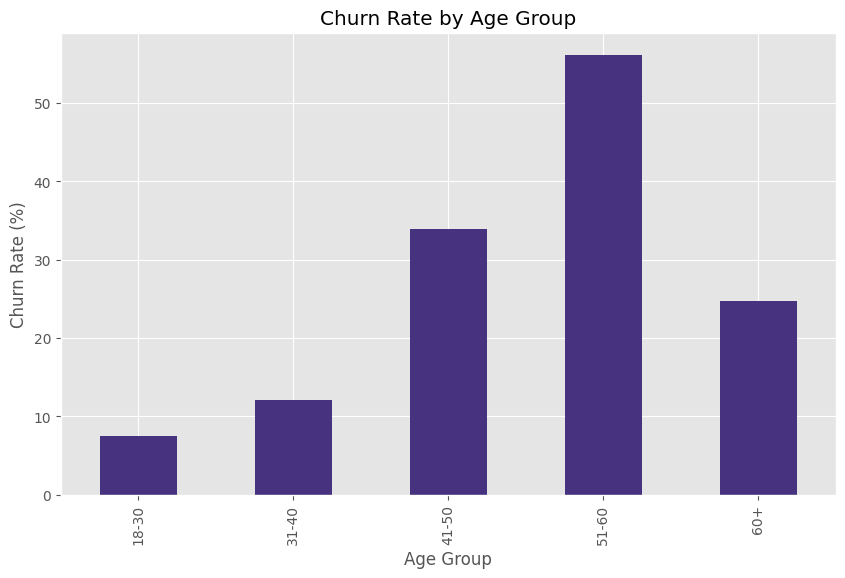

In [11]:
# Age distribution by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Age groups and churn rate
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], 
                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(10, 6))
age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100
age_churn.plot(kind='bar')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.show()

3.6 Balance Analysis

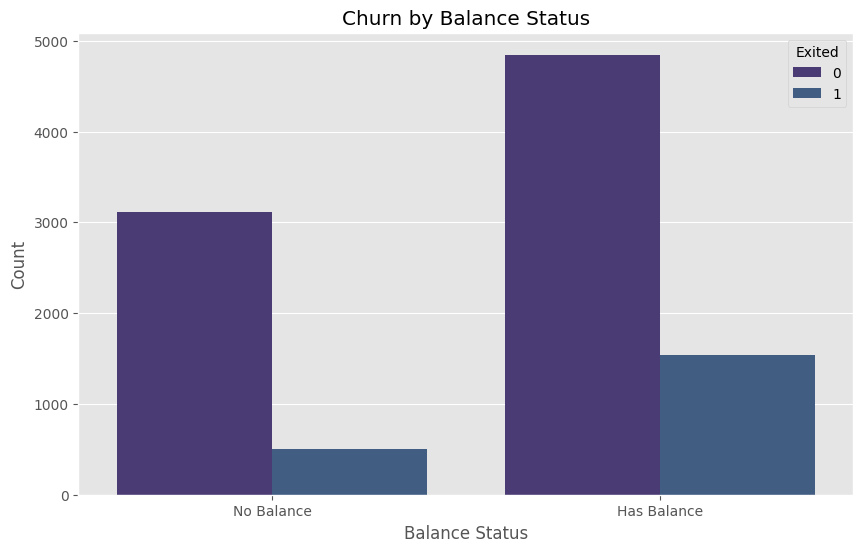


Churn rate by Balance Status:
HasBalance
Has Balance    24.079586
No Balance     13.823611
Name: Exited, dtype: float64


In [12]:
# Create a balance category (Zero/Non-Zero)
df['HasBalance'] = df['Balance'].apply(lambda x: 'No Balance' if x == 0 else 'Has Balance')

plt.figure(figsize=(10, 6))
sns.countplot(x='HasBalance', hue='Exited', data=df)
plt.title('Churn by Balance Status')
plt.xlabel('Balance Status')
plt.ylabel('Count')
plt.show()

# Churn rate by balance status
balance_churn = df.groupby('HasBalance')['Exited'].mean() * 100
print("\nChurn rate by Balance Status:")
print(balance_churn)

TASK 2 Model Training and Evaluation

1. Data Preparation

In [13]:
# Remove the features created during EDA that we don't want to use in modeling
df_model = df.drop(['HasBalance', 'AgeGroup'], axis=1)

# Identify categorical and numerical features
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                      'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Model Training

In [14]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC curve and AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC: {auc:.4f}")
    
    return accuracy, precision, recall, f1, auc

# Model 1: Logistic Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
lr_pipeline.fit(X_train, y_train)
lr_metrics = evaluate_model(lr_pipeline, X_test, y_test, "Logistic Regression")

# Model 2: Decision Tree
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dt_pipeline.fit(X_train, y_train)
dt_metrics = evaluate_model(dt_pipeline, X_test, y_test, "Decision Tree")


--- Logistic Regression Results ---
Accuracy: 0.8110
Precision: 0.5524
Recall: 0.2010
F1 Score: 0.2948

Confusion Matrix:
[[1543   64]
 [ 314   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

AUC: 0.7789

--- Decision Tree Results ---
Accuracy: 0.7810
Precision: 0.4490
Recall: 0.5038
F1 Score: 0.4748

Confusion Matrix:
[[1364  243]
 [ 195  198]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79    

3. Model Comparison Visualization

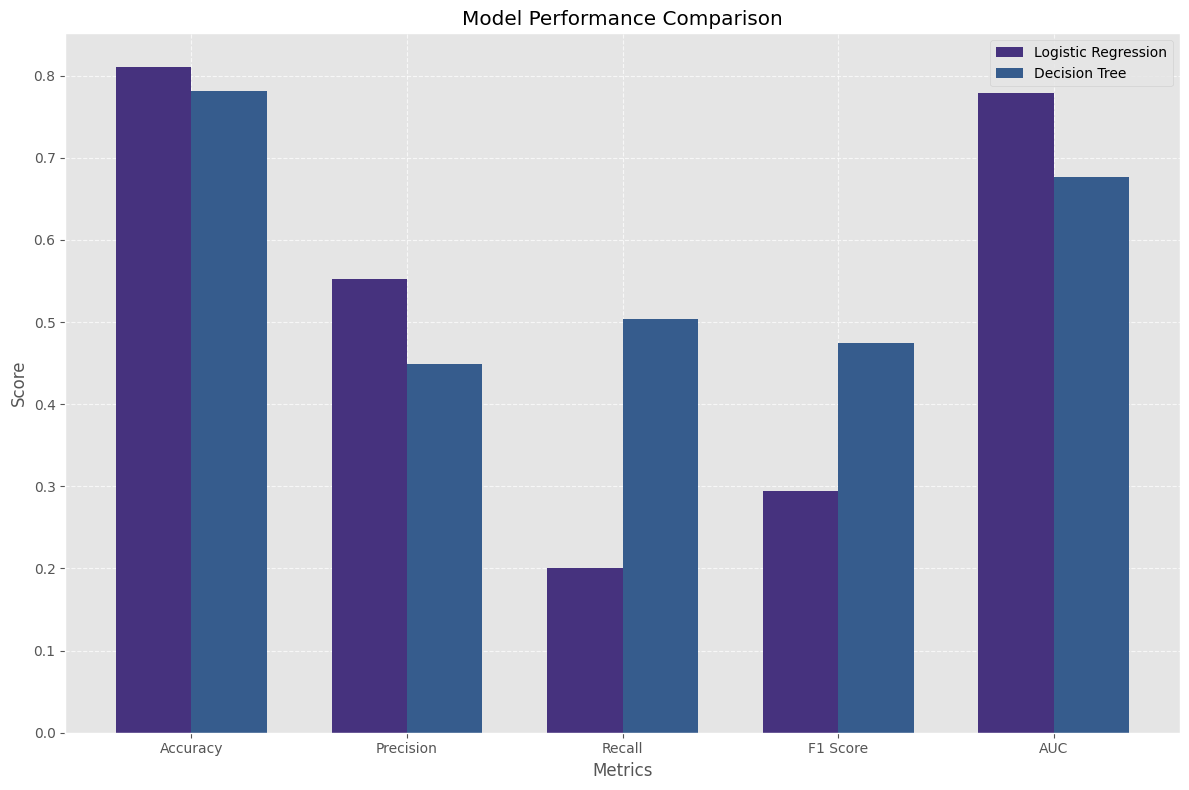

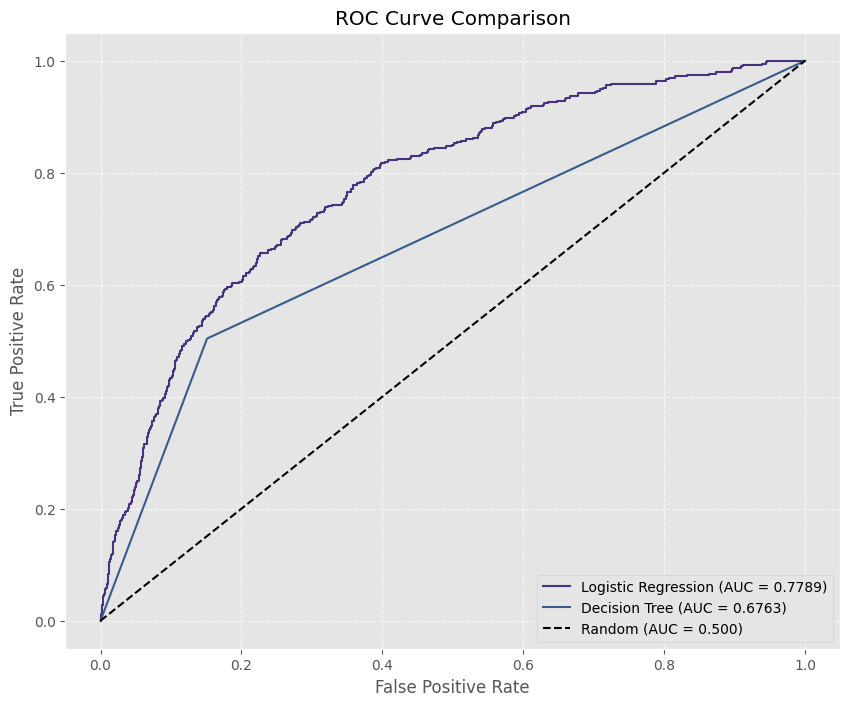

In [15]:
# Create data for visualization
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
models = ['Logistic Regression', 'Decision Tree']
metrics_data = {
    'Metric': metrics_names,
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics
}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': metrics_names,
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics
})

# Plot comparison
plt.figure(figsize=(12, 8))
bar_width = 0.35
x = np.arange(len(metrics_names))

plt.bar(x - bar_width/2, lr_metrics, bar_width, label='Logistic Regression')
plt.bar(x + bar_width/2, dt_metrics, bar_width, label='Decision Tree')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics_names)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Get probabilities and calculate ROC curve for Logistic Regression
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')

# Get probabilities and calculate ROC curve for Decision Tree
y_prob_dt = dt_pipeline.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')

# Add diagonal line representing random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

4. Feature Importance Analysis

C:\Users\cpill\AppData\Local\Temp\ipykernel_3096\4239094300.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute Importance', y='Feature', data=lr_importance_df.head(10), palette=colors)


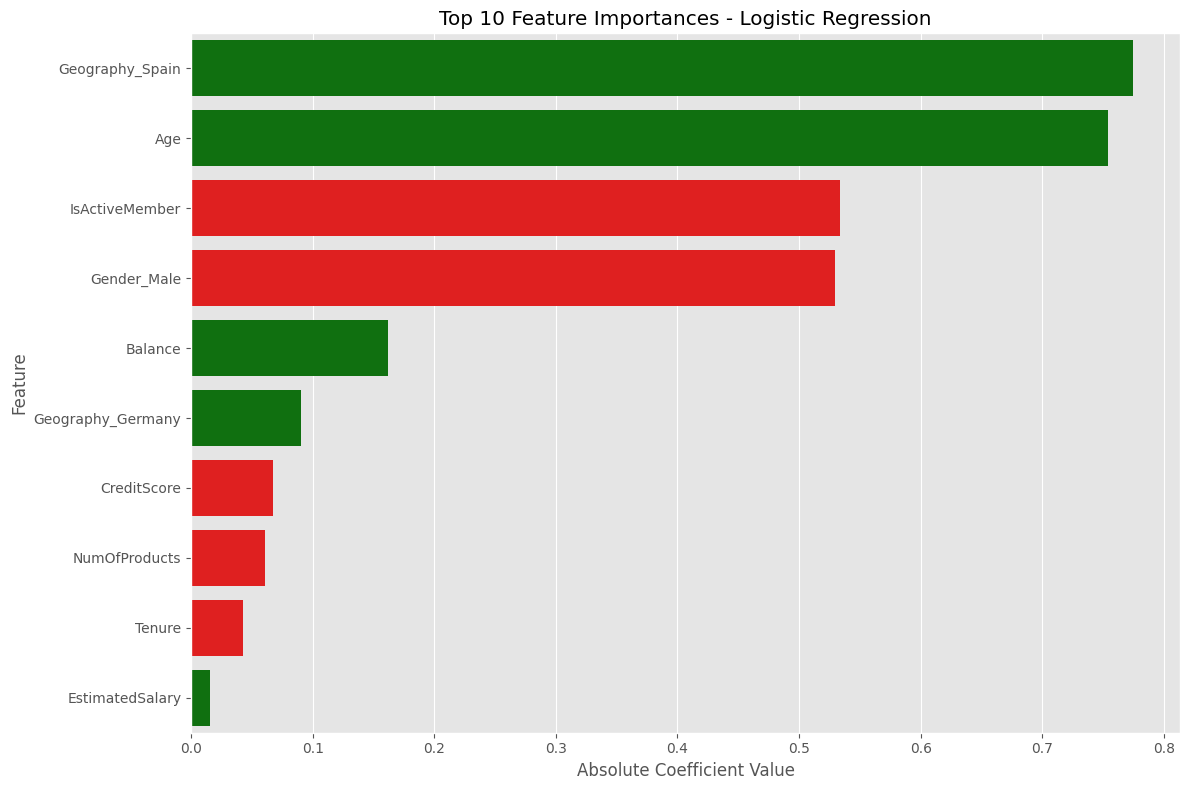

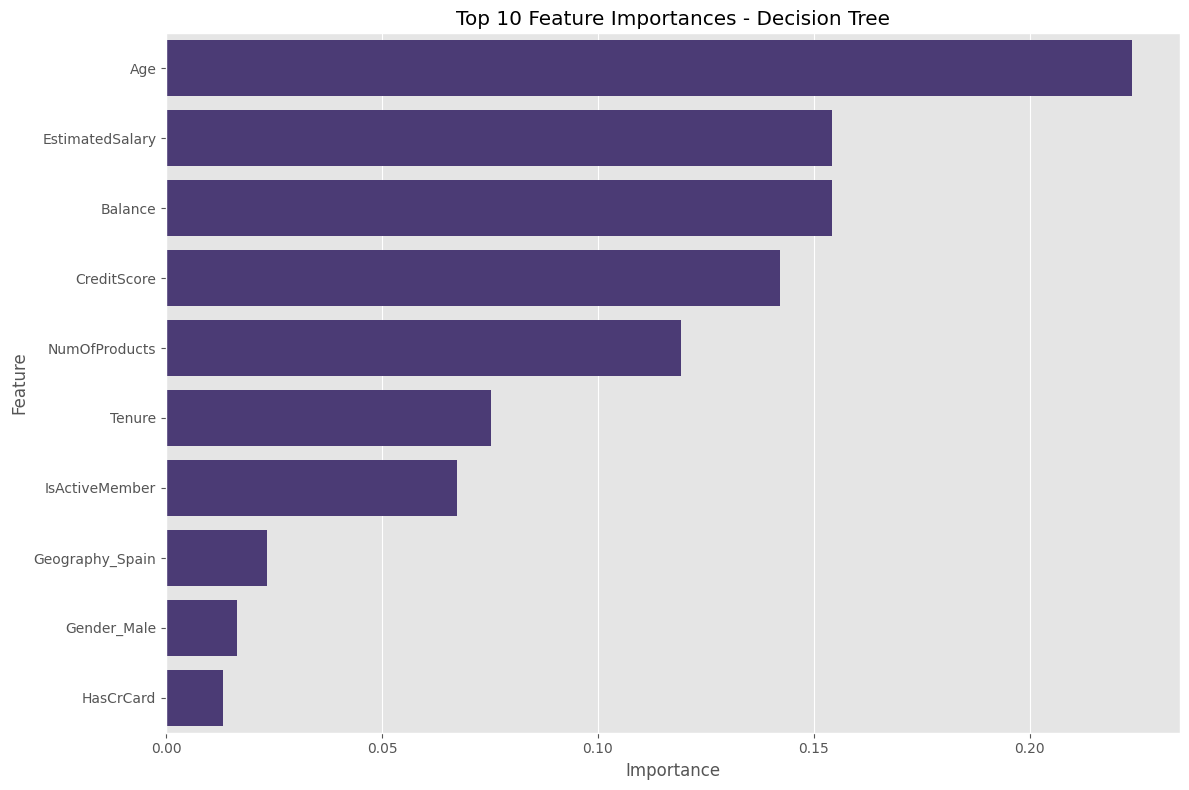

In [16]:
# Get feature names after preprocessing
feature_names = numerical_features.copy()
for cat_feature in categorical_features:
    # Get one-hot encoded feature names (excluding the first category which is dropped)
    encoded_features = [f"{cat_feature}_{cat}" for cat in 
                         X[cat_feature].unique()[1:]]
    feature_names.extend(encoded_features)

# Feature importance for Logistic Regression
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

# Create DataFrame for feature importance
lr_importance_df = pd.DataFrame({
    'Feature': feature_names, 
    'Coefficient': lr_coefficients,
    'Absolute Importance': np.abs(lr_coefficients)
})

# Sort by absolute importance
lr_importance_df = lr_importance_df.sort_values('Absolute Importance', ascending=False)

# Plot top 10 features for Logistic Regression
plt.figure(figsize=(12, 8))
colors = ['red' if coef < 0 else 'green' for coef in lr_importance_df.head(10)['Coefficient']]
sns.barplot(x='Absolute Importance', y='Feature', data=lr_importance_df.head(10), palette=colors)
plt.title('Top 10 Feature Importances - Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Feature importance for Decision Tree
dt_importances = dt_pipeline.named_steps['classifier'].feature_importances_

# Create DataFrame for feature importance
dt_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_importances
})

# Sort by importance
dt_importance_df = dt_importance_df.sort_values('Importance', ascending=False)

# Plot top 10 features for Decision Tree
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df.head(10))
plt.title('Top 10 Feature Importances - Decision Tree')
plt.tight_layout()
plt.show()

5. Conclusion and Model Selection

In [17]:
print("\n--- Model Performance Summary ---")
print(comparison_df)

# Determine which model performed better overall
if sum(lr_metrics[:4]) > sum(dt_metrics[:4]):  # Excluding AUC from sum
    better_model = "Logistic Regression"
else:
    better_model = "Decision Tree"

print(f"\nBased on overall performance metrics, the {better_model} model performs better for predicting customer churn at SmartBank.")

# Provide business recommendations
print("\n--- Business Recommendations ---")
print("1. Focus on addressing age-related churn factors, as age is a significant predictor")
print("2. Develop strategies to increase member activity, as active members are less likely to churn")
print("3. Consider special attention to customers with high balances who might be seeking better returns elsewhere")
print("4. Target customers with fewer products for cross-selling opportunities to reduce churn risk")


--- Model Performance Summary ---
      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.811000       0.781000
1  Precision             0.552448       0.448980
2     Recall             0.201018       0.503817
3   F1 Score             0.294776       0.474820
4        AUC             0.778875       0.676302

Based on overall performance metrics, the Decision Tree model performs better for predicting customer churn at SmartBank.

--- Business Recommendations ---
1. Focus on addressing age-related churn factors, as age is a significant predictor
2. Develop strategies to increase member activity, as active members are less likely to churn
3. Consider special attention to customers with high balances who might be seeking better returns elsewhere
4. Target customers with fewer products for cross-selling opportunities to reduce churn risk
